Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 05: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, December 16, 2024**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

YOUR ANSWER HERE

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

YOUR ANSWER HERE

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

YOUR ANSWER HERE

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

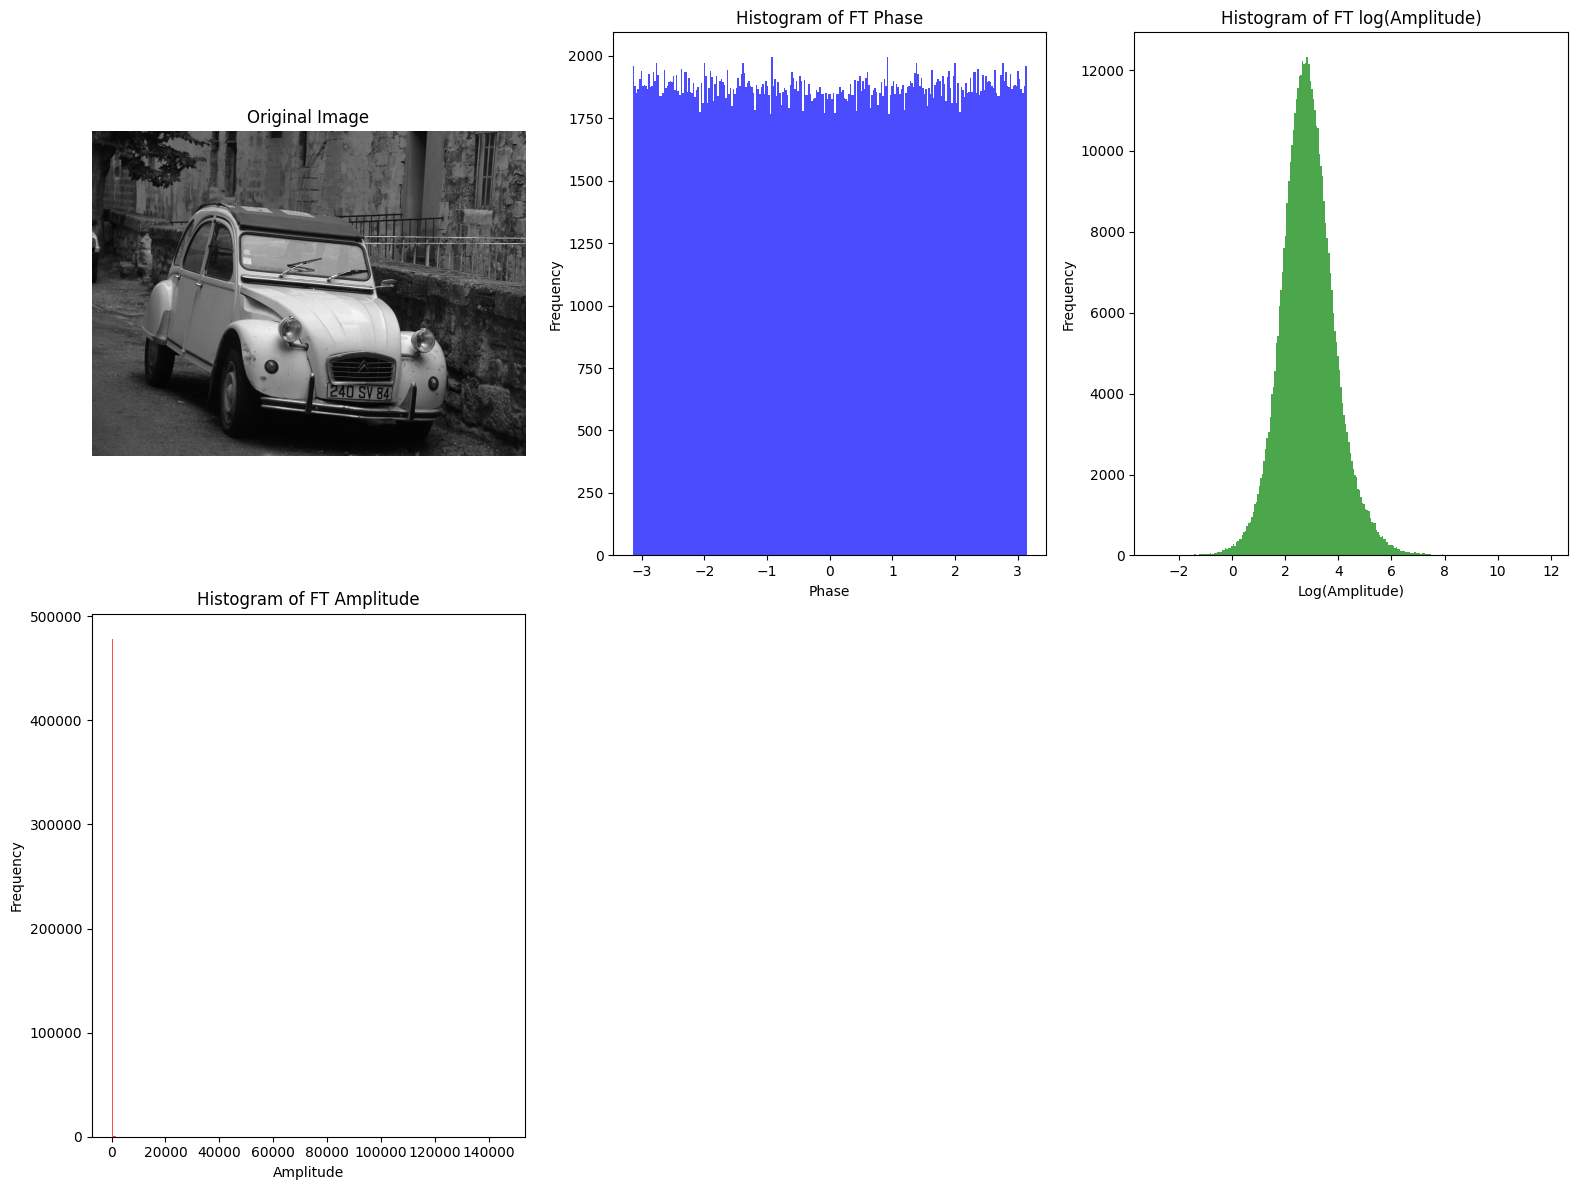

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

ft_img = np.fft.fft2(img)


# Plotting the images side by side
plt.figure(figsize=(16, 12))  # Set the figure size (width, height)

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.axis('off')  # Remove axis

# Histogram of the FT phase
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 3
plt.hist(np.angle(ft_img).ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram of FT Phase')
plt.xlabel('Phase')
plt.ylabel('Frequency')

# Histogram of the FT log amplitude
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 4
plt.hist(np.log(np.abs(ft_img)).ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histogram of FT log(Amplitude)')
plt.xlabel('Log(Amplitude)')
plt.ylabel('Frequency')

# Histogram of the FT amplitude
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 5
plt.hist(np.abs(ft_img).ravel(), bins=256, color='red', alpha=0.7)
plt.title('Histogram of FT Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()  # Automatically adjust subplot spacing
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-06, slide 16-20.

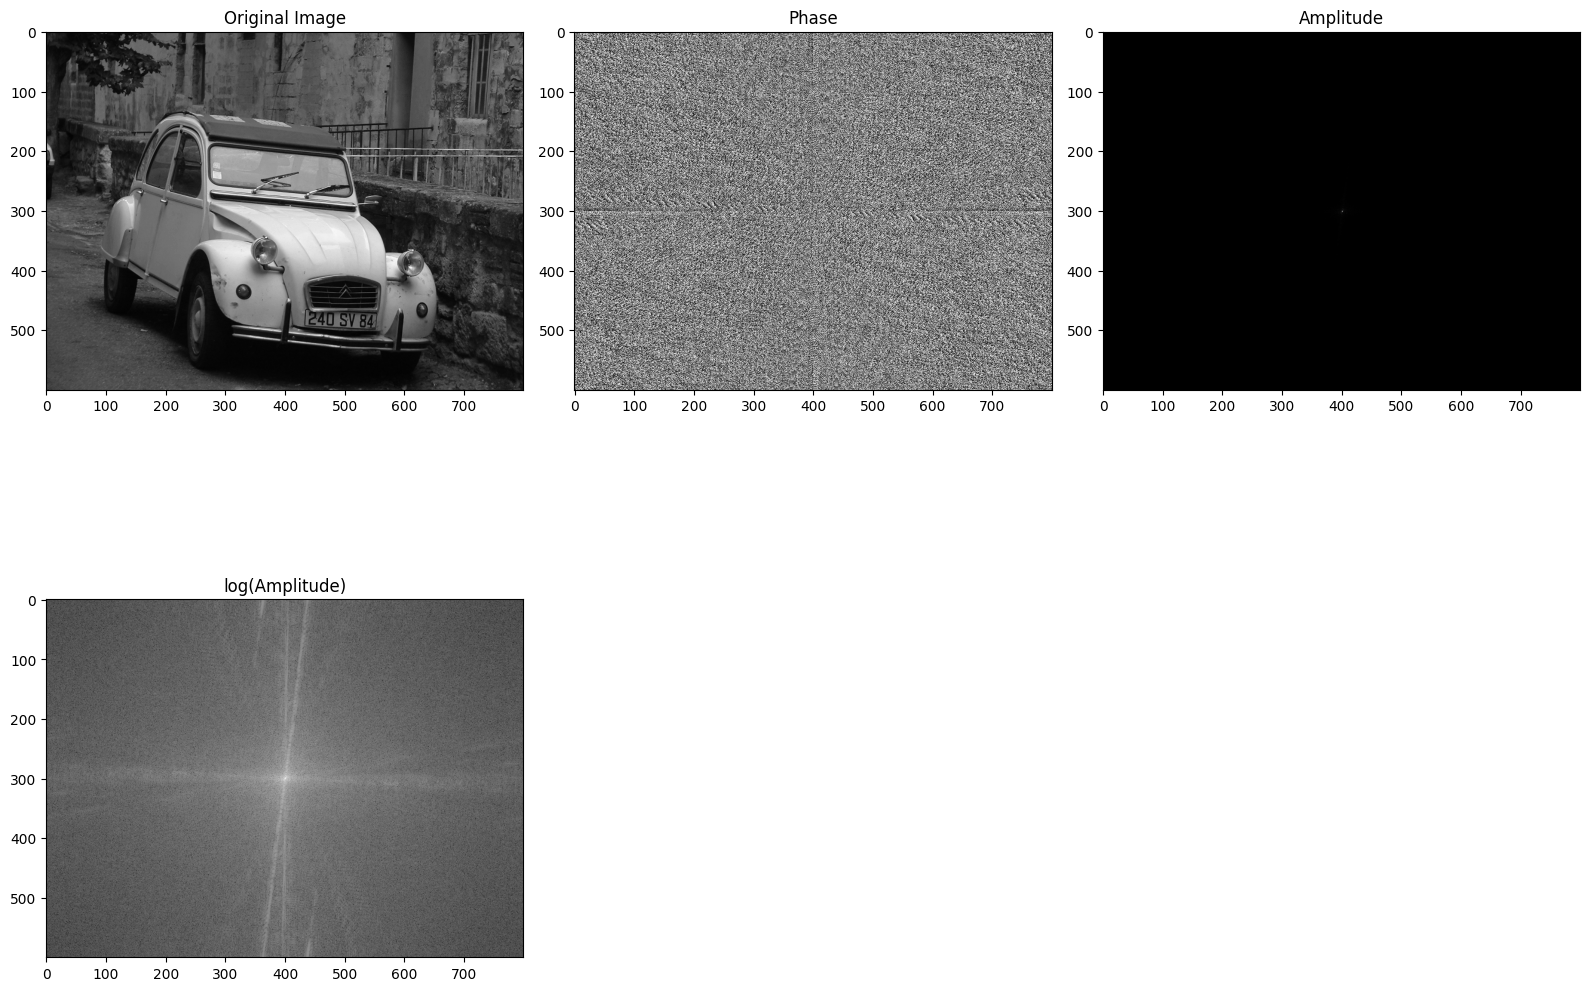

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

ft_img =np.fft.fftshift(np.fft.fft2(img))


plt.figure(figsize=(16, 12))  

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')

# Histogram of the FT phase
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
plt.imshow(np.angle(ft_img), cmap="gray")
plt.title('Phase')

# Histogram of the FT amplitude
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
plt.imshow(np.abs(ft_img), cmap="gray")
plt.title('Amplitude')

# Histogram of the FT log(amplitude)
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 3
plt.imshow(np.log(np.abs(ft_img)), cmap="gray")
plt.title('log(Amplitude)')

# Adjust layout
plt.tight_layout() 
plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

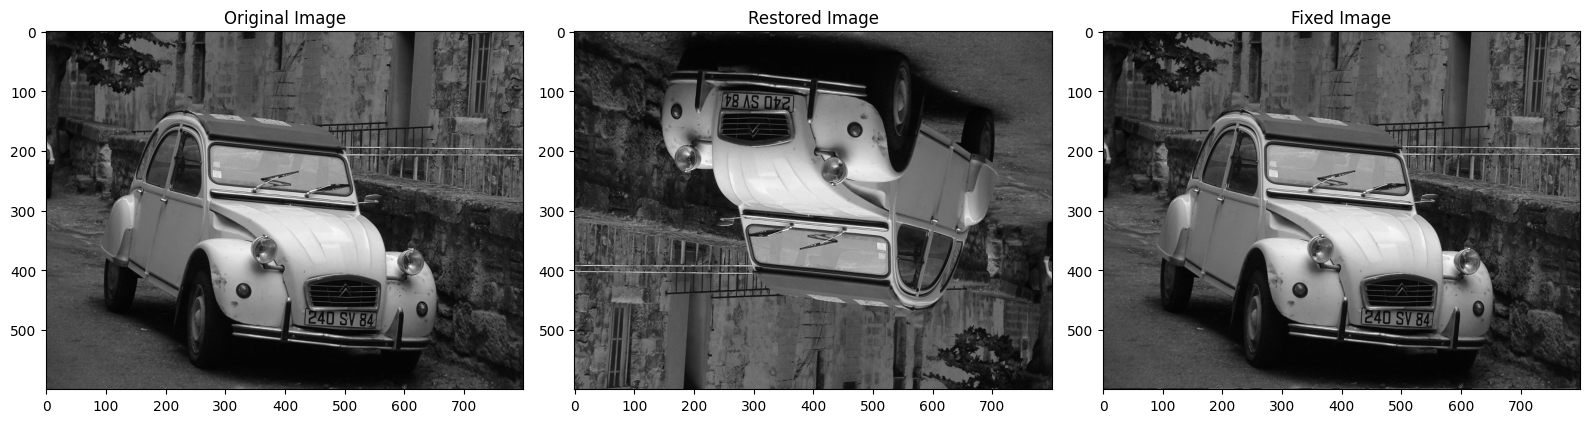

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def restore_img(img):
    img = np.fft.fft2(img).real
    img = np.flip(img, axis=0)
    img = np.flip(img, axis=1)
    return img

img = plt.imread('images/dolly.png')
ft_img = np.fft.fft2(img)
fixed_img_1  = np.fft.fft2(ft_img)
fixed_img_2  = restore_img(ft_img)

plt.figure(figsize=(16, 12))  

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')

# Restored image
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
plt.imshow(fixed_img_1.real, cmap="gray")
plt.title('Restored Image')

# Fixed image
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
plt.imshow(fixed_img_2, cmap="gray")
plt.title('Fixed Image')

# Adjust layout
plt.tight_layout() 
plt.show()

When you apply the Fourier Transform (FT) twice on a signal $ f(t) $, the result is a **flipped** version of the original signal. Mathematically, this is expressed as:

$$
\mathcal{F}[\mathcal{F}[f(t)]] = 2\pi \cdot f(-t)
$$

The first FT transforms the signal from the time/space domain to the frequency domain. The second FT reverses this transformation but **flips** the signal in time/space and introduces a scaling factor of $ 2\pi $. This occurs due to the symmetry properties of FT.


**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

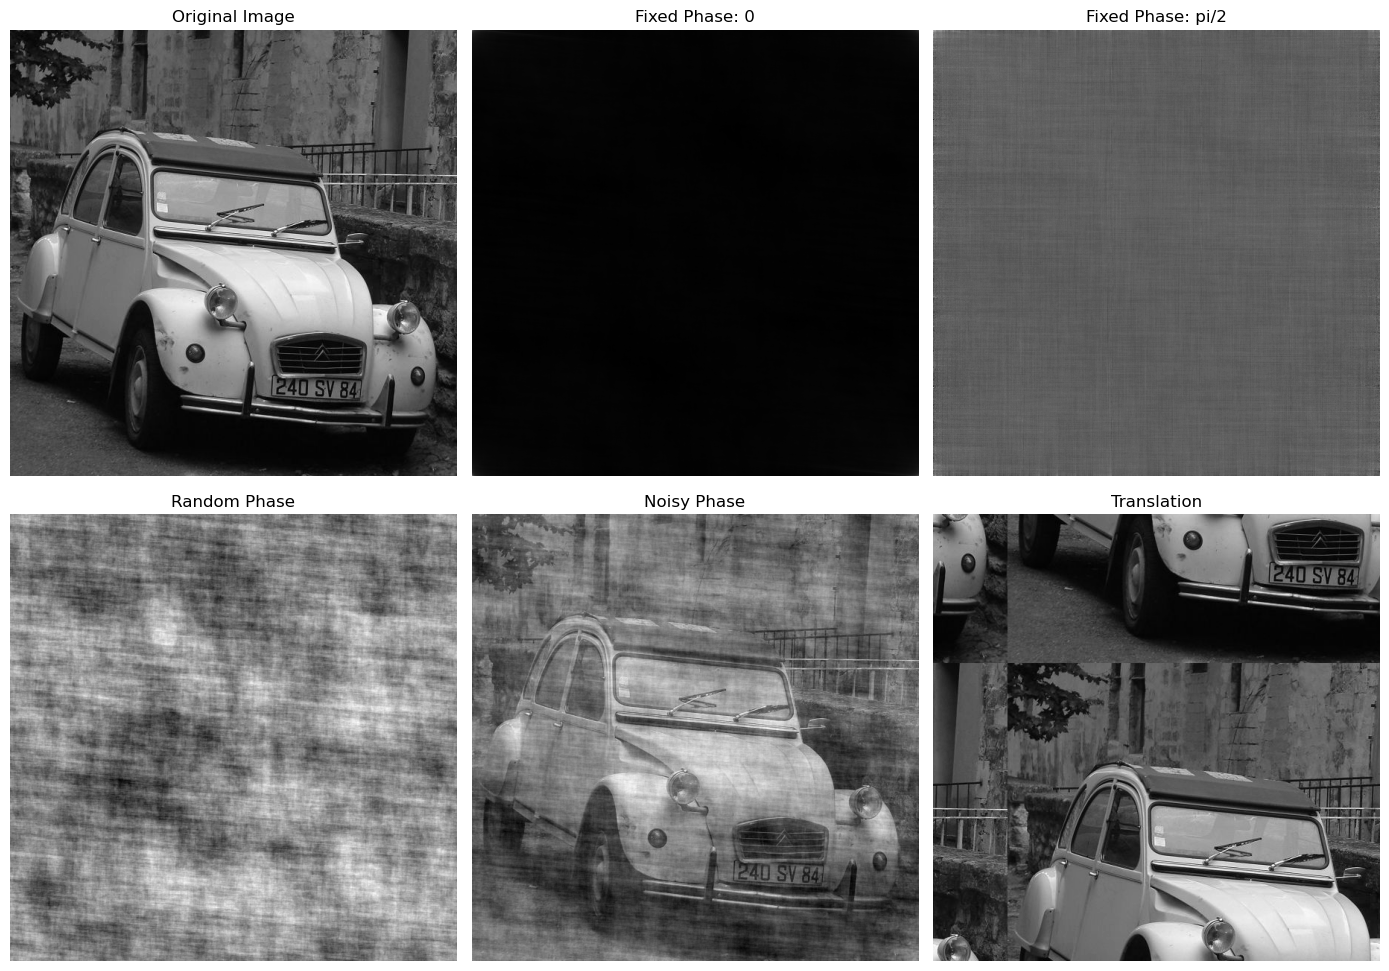

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# Compute the 2D FFT of the image
fft_image = np.fft.fft2(img)

# Shift the zero frequency component to the center
fft_image_shifted = np.fft.fftshift(fft_image)

# Extract the amplitude and phase
amplitude = np.abs(fft_image_shifted)
original_phase = np.angle(fft_image_shifted)

# Phase manipulation options:

# Fixed phases (e.g., 0, pi/2, pi)
fixed_phases = [0, np.pi/2, np.pi, 3*np.pi/2]

# Random phase (uniformly distributed between -pi and pi)
random_phase = np.random.uniform(-np.pi, np.pi, original_phase.shape)

# Noisy phase (original phase with added noise)
noise = np.random.normal(0, 0.7, original_phase.shape)  # Small noise
noisy_phase = original_phase + noise

# Translation with a larger shift
dx, dy = 200, 100  # Increased shifts for a more pronounced translation
M, N = img.shape
u = np.fft.fftfreq(M) * M
v = np.fft.fftfreq(N) * N
U, V = np.meshgrid(u, v, indexing='ij')
translation_phase = np.exp(-2j * np.pi * ((U * dx / M) + (V * dy / N)))
ft_translation = fft_image * translation_phase
translation_img = np.fft.ifft2(ft_translation)
translation_img = np.abs(translation_img)


# Function to reconstruct image from modified phase
def reconstruct_image(amplitude, phase):
    fft_image_reconstructed = amplitude * np.exp(1j * phase)
    fft_image_reconstructed_shifted = np.fft.ifftshift(fft_image_reconstructed)
    return np.real(np.fft.ifft2(fft_image_reconstructed_shifted))

# Display results for different phase manipulations
plt.figure(figsize=(14, 10))

# Original image (for reference)
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Fixed phase: 0
phase_fixed_0 = np.ones_like(original_phase) * 0
reconstructed_0 = reconstruct_image(amplitude, phase_fixed_0)
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_0, cmap='gray')
plt.title('Fixed Phase: 0')
plt.axis('off')

# Fixed phase: pi/2
phase_fixed_pi_2 = np.ones_like(original_phase) * np.pi/2
reconstructed_pi_2 = reconstruct_image(amplitude, phase_fixed_pi_2)
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_pi_2, cmap='gray')
plt.title('Fixed Phase: pi/2')
plt.axis('off')

# Random phase
reconstructed_random = reconstruct_image(amplitude, random_phase)
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_random, cmap='gray')
plt.title('Random Phase')
plt.axis('off')

# Noisy phase
reconstructed_noisy = reconstruct_image(amplitude, noisy_phase)
plt.subplot(2, 3, 5)
plt.imshow(reconstructed_noisy, cmap='gray')
plt.title('Noisy Phase')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(translation_img, cmap='gray')
plt.title('Translation')
plt.axis('off')

plt.tight_layout()
plt.show()



**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


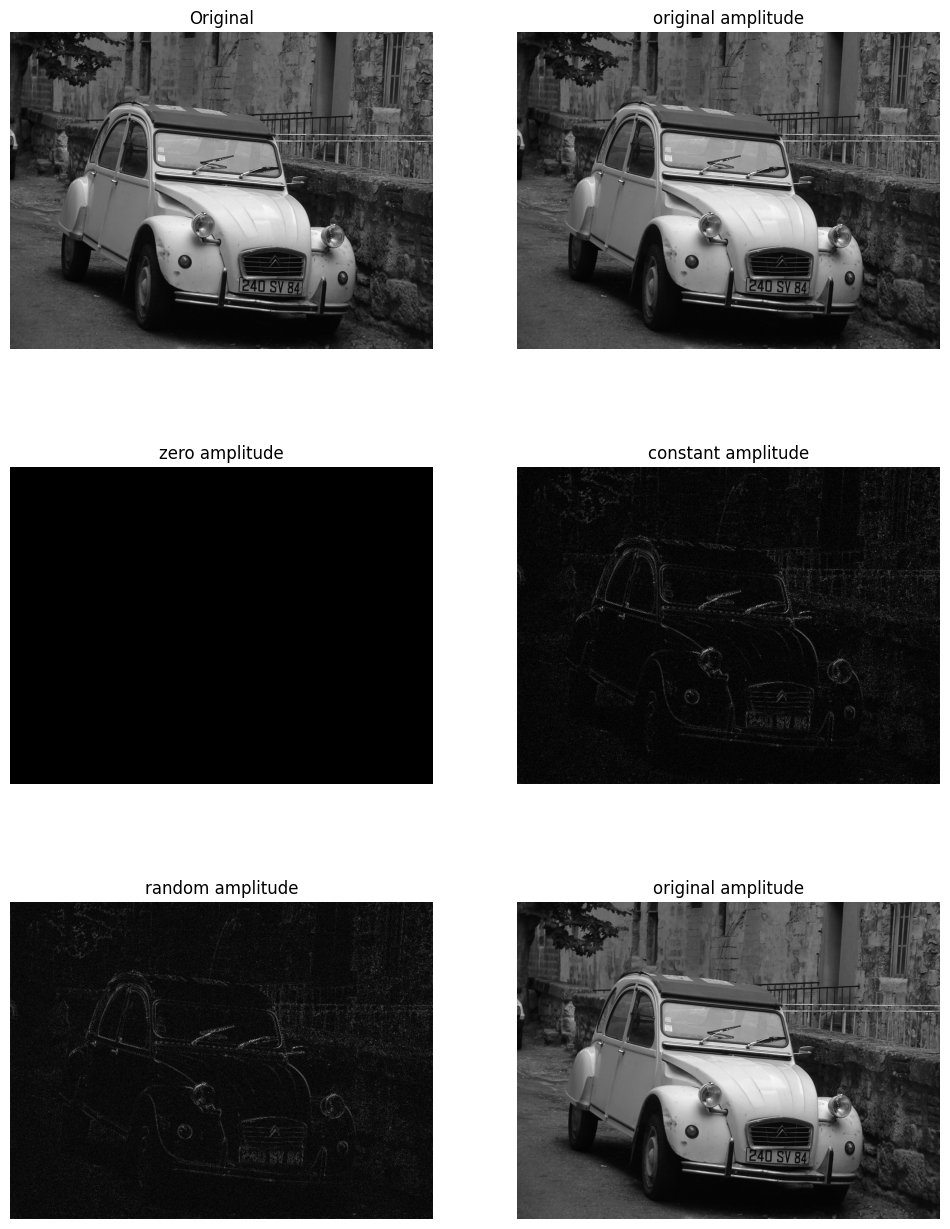

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

1. **Original Image (Amplitude & Phase)**: This will be the original image, as both the amplitude and phase are unchanged

2. **Zero Amplitude**: When the amplitude is set to zero, all frequency components are suppressed. The inverse FFT of this results in a blank image, because no frequency information is left to form the image

3. **Constant Amplitude**: Setting the amplitude to a constant value (e.g., the maximum amplitude of the original image) will give equal weight to all frequency components. The resulting image will be a **blurred version** of the original because the phase still encodes the spatial layout, but the uniform amplitude distributes the frequency components evenly, leading to a less detailed image. The image structure still follows the original phase, but the details are averaged out

4. **Random Amplitude**: When the amplitude is randomly distributed, we create a **random noise pattern**. This is because the phase is fixed, but the amplitude values (which control the strength of each frequency) are randomly altered. As a result, the spatial structure of the image is disrupted, and the reconstructed image looks like random noise

5. **Original Amplitude (Reconstruction)**: This will yield the original image, as both the amplitude and phase are unchanged

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

The Fourier transform is a mathematical technique used to analyze signals (such as images) by decomposing them into their constituent frequencies. In the context of images, rather than viewing the image in the typical spatial domain (where pixels represent the image directly), the Fourier transform allows us to represent the image in terms of frequencies.

The frequency space is a domain where the image is represented by the frequencies of the underlying waves that make up the image.

Point in frequency space represents - amplitude and phase

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

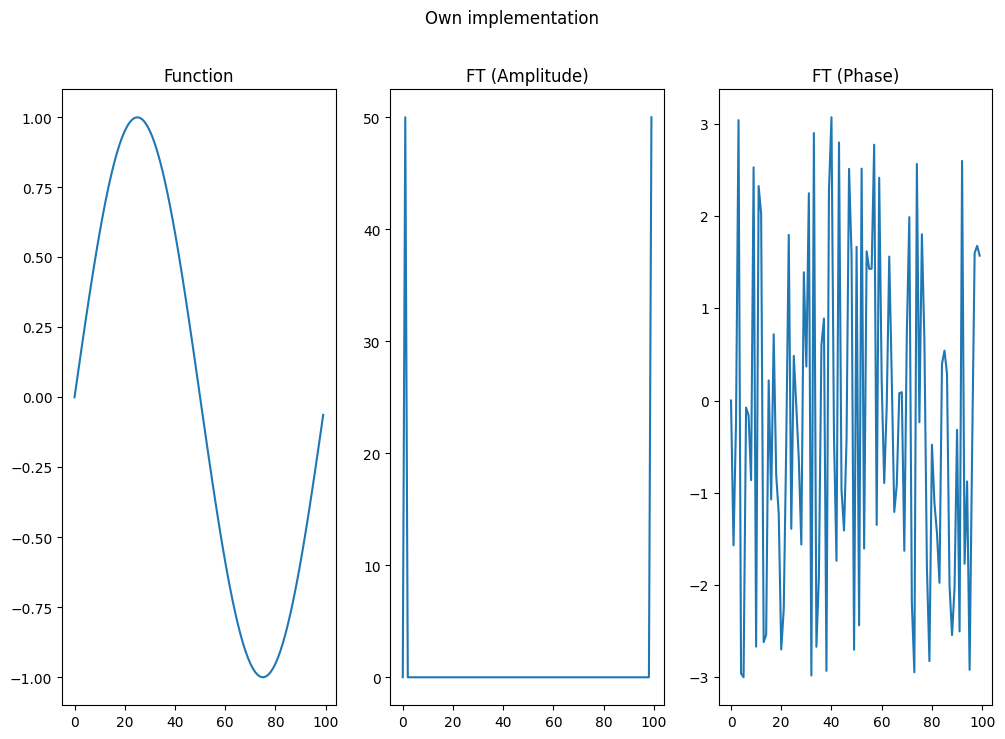

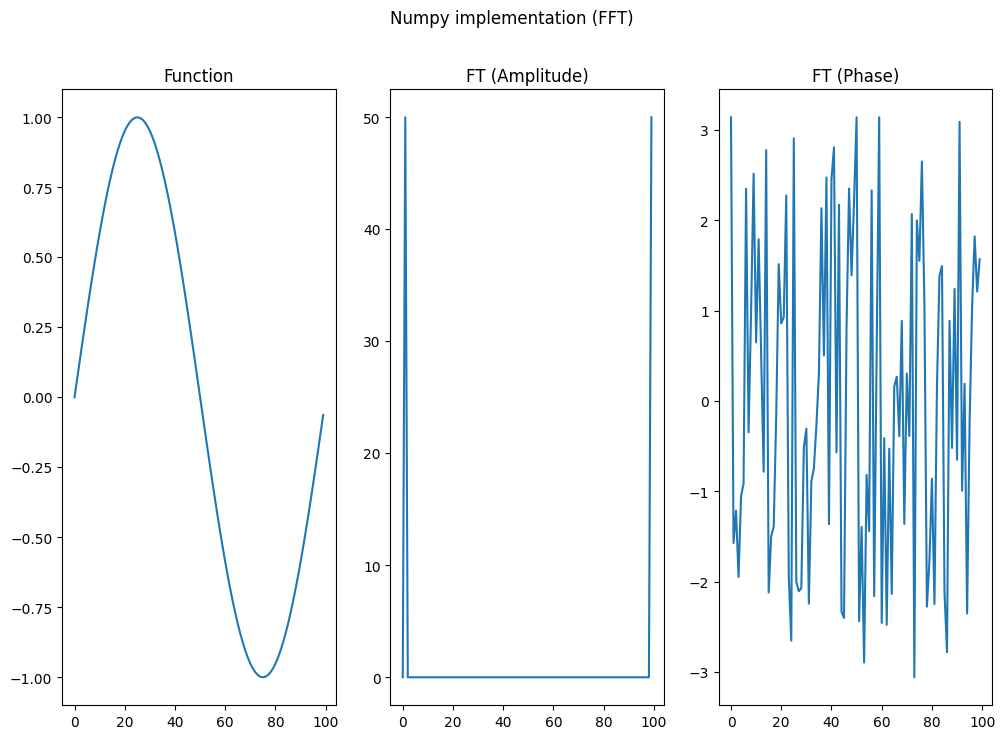

In [8]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    N = len(func)
    ft = np.zeros(N, dtype=complex)

    for idx in range(N):
        ft[idx] = np.sum(func * np.exp(-2j * np.pi * idx * np.arange(N) / N))
    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`. 
Hint: If you experience long runtimes use a smaller part of the image for development. 

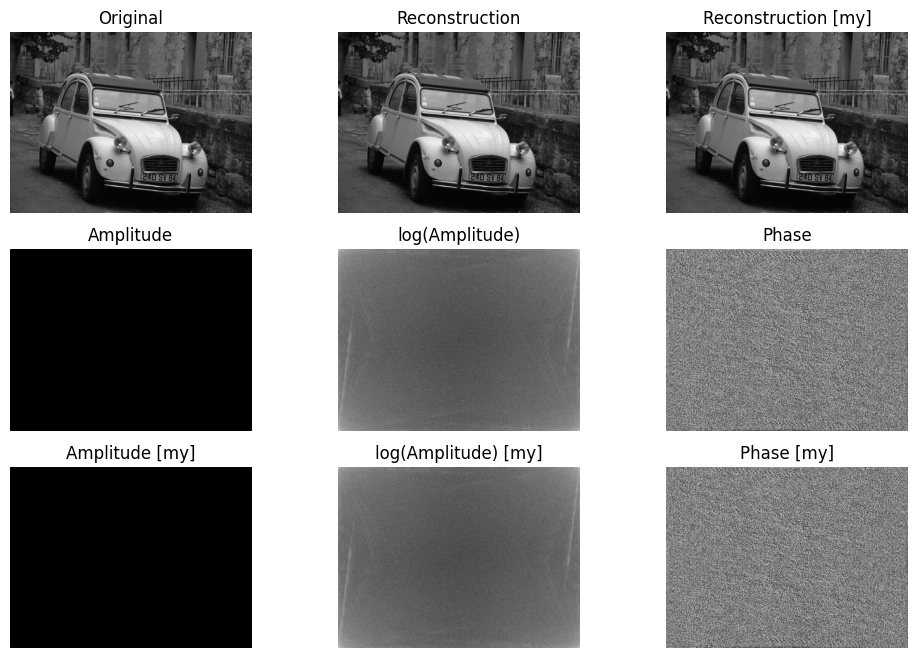

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Compute the 2D Fourier Transform of an image using the mathematical formula
    without explicit loops, using only numpy.

    Args:
        img (ndarray): Input image as a 2D NumPy array.

    Returns:
        ndarray: The Fourier-transformed version of the image as complex values.
    """
    M, N = img.shape  # Get the dimensions of the image
    ft = np.zeros((M, N), dtype=complex)  # Initialize the result as a complex array

    # Perform the DFT manually for 2D
    for u in range(M):
        for v in range(N):
            # Initialize the frequency component F(u, v)
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    # Apply the 2D Fourier transform formula
                    exponent = -2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += img[x, y] * np.exp(exponent)
            ft[u, v] = sum_val

    return ft


def FFT1D(x):
    """
    Recursive Cooley-Tukey FFT for 1D.
    The input array x should have length that is a power of 2.
    If not, it is padded with zeros.
    """
    N = len(x)
    
    # If the length of x is not a power of 2, pad the array with zeros
    if not (N & (N - 1)) == 0:  # Checks if N is not a power of 2
        new_size = 2**int(np.ceil(np.log2(N)))  # Find the next power of 2
        x = np.pad(x, (0, new_size - N), 'constant')  # Pad with zeros to make it a power of 2

    N = len(x)  # Update N after padding
    
    # Base case: when the length is 1, return the array itself
    if N == 1:
        return x
    else:
        # Recursively calculate the FFT for even and odd indexed parts
        X_even = FFT1D(x[::2])  # FFT for the even-indexed elements
        X_odd = FFT1D(x[1::2])   # FFT for the odd-indexed elements
        
        # Compute the twiddle factors (complex exponentials)
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        
        # Combine the even and odd parts
        X = np.concatenate([X_even + factor[:N//2] * X_odd,   # First half of the FFT
                            X_even + factor[N//2:] * X_odd])  # Second half of the FFT
        return X

def FFT2D(img):
    """
    Perform a recursive 2D FFT on a 2D image using 1D FFTs.
    
    Args:
        img (ndarray): 2D NumPy array representing the input image.
        
    Returns:
        ndarray: The 2D Fourier transformed image as complex values.
    """
    # Apply 1D FFT to each row (axis=1)
    rows_fft = np.array([FFT1D(row) for row in img])  # Apply FFT row-wise
    
    # Apply 1D FFT to each column (axis=0) of the transformed rows
    cols_fft = np.array([FFT1D(col) for col in rows_fft.T]).T  # Apply FFT column-wise on the result of row FFT
    
    return cols_fft  # Return the 2D FFT result as a 2D array of complex numbers
    

def fourier2d_vectorized(img):
    """
    Compute the 2D DFT using vectorized operations.
    Still O(M²N²) complexity, but uses NumPy broadcasting.
    This might still be extremely slow for large images.
    
    Args:
        img (ndarray): 2D grayscale image.
    
    Returns:
        ndarray (complex): The 2D Fourier transform of the input image.
    """
    M, N = img.shape
    
    # Create arrays for coordinates
    x = np.arange(M)
    y = np.arange(N)
    
    # Compute the exponent for all pairs (u,x) and (v,y) using broadcasting
    # For each u, x_exp[u,x] = exp(-2πi(u*x/M))
    # For each v, y_exp[v,y] = exp(-2πi(v*y/N))
    x_exp = np.exp(-2j * np.pi * (x[:, None] / M) * np.arange(M)[None, :])
    y_exp = np.exp(-2j * np.pi * (y[:, None] / N) * np.arange(N)[None, :])
    
    # We need to combine them for all (u,v): 
    # F(u,v) = sum over x,y: f(x,y)*exp(-2πi(u*x/M))*exp(-2πi(v*y/N))
    # After computing expansions, we have to carefully rearrange and multiply.
    
    # One way is to note:
    # F(u,v) = sum_x [f(x,y)*exp(-2πi(u*x/M)) over x] * (then sum over y with exp(-2πi(v*y/N)))
    # But directly doing this in a fully vectorized manner still involves large intermediate arrays.
    
    # Let's break it down step-by-step:
    ft = np.zeros((M, N), dtype=complex)
    
    # Compute the transform along one dimension first (e.g. x), then along the other (y).
    # First, transform along x for each row separately:
    # G(u,y) = Σ_x f(x,y)*exp(-2πi(u*x/M))
    # shape: G(u,y)
    G = x_exp @ img  # matrix multiplication: (M,M) @ (M,N) -> (M,N)
    # x_exp[u,x] * f(x,y), sum over x
    
    # Now, we still need to multiply this by the exponent in y and sum over y:
    # F(u,v) = Σ_y G(u,y)*exp(-2πi(v*y/N))
    # We can do a matrix multiplication in the y dimension by transposing appropriately.
    
    # Re-arrange so we can multiply along y:
    # G(u,y) is (M,N), we want to multiply by y_exp[v,y] and sum over y
    # y_exp[v,y] is (N,N), so we do G(u,y) * y_exp^T(y,v) to sum over y
    F = G @ y_exp.T  # (M,N) @ (N,N) -> (M,N)
    
    return F


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

# Compute the Fourier transforms
lib_fft = np.fft.fft2(img)

# Implementation according to formula from lecture
#my_dft = FFT2D(img)

# Vectorized DFT --> Fastest Version
my_dft_vect=fourier2d_vectorized(img)

# Recursive version, divided in even and odd polynomials to reduce redundancy
#my_fft = FFT2D(img)
my_ft = my_dft_vect

# Compute amplitude and phase
amplitude = np.abs(lib_fft)
phase = np.angle(lib_fft)
restore = np.real(np.fft.ifft2(lib_fft))

my_amplitude = np.abs(my_ft)
my_phase = np.angle(my_ft)
M, N = img.shape
my_restore = np.real(np.fft.ifft2(my_ft))[:M, :N] # Cropping for the FFT due to padding, doesn't harm 

# Plot results
plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

plt.show()

## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

The Convolution Theorem states that the Fourier transform of the convolution of two functions is the pointwise product of their Fourier transforms:

$$
\mathcal{F}\{f(x) \ast g(x)\} = \mathcal{F}\{f(x)\} \cdot \mathcal{F}\{g(x)\}
$$

This means that instead of performing the convolution directly in the time/space domain, you can multiply their Fourier transforms in the frequency domain.

### Practical Consequences:

1. Convolution in the frequency domain (using Fourier transforms) is faster than direct computation in the time/space domain, especially for large datasets
  
2. In image filtering (e.g., blurring, edge detection), convolution can be performed faster by multiplying Fourier transforms of the image and filter

3. Reduces computation complexity from direct summation (in time/space) to multiplication (in frequency), improving performance in large-scale problems


**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

From the perspective of Fourier analysis, the natural way to handle boundary pixels is **zero-padding**. This involves adding extra zeros around the boundary of the image (or signal) before applying the Fourier transform. This method avoids discontinuities at the borders, which can create artifacts when transforming back to the spatial domain.

1. **Preserves periodicity**: Fourier transforms assume periodicity, and zero-padding ensures the image or signal has a smooth transition at the boundaries
2. **Prevents edge effects**: By padding with zeros, we avoid the abrupt changes that would otherwise appear at the edges, which would distort the results of convolution

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


Using the Convolution Theorem, the complexity of computing a convolution in the frequency domain involves three main steps:

1. **Fourier Transform of Image and Kernel**: 
   The complexity for computing the 2D Fourier transform of both the image $g$ of size $M \times N$ and the kernel $k$ of size $(2m+1) \times (2n+1)$ is $O(MN \log(MN))$, assuming the use of an efficient FFT algorithm.

2. **Pointwise Multiplication**:
   After transforming both the image and kernel, the pointwise multiplication in the frequency domain has complexity $O(MN)$.

3. **Inverse Fourier Transform**:
   Computing the inverse Fourier transform to return to the spatial domain is also $O(MN \log(MN))$.

Thus, the total complexity is:
$$
O(MN \log(MN)) + O(MN) + O(MN \log(MN)) = O(MN \log(MN))
$$

### Comparison with Direct Convolution Complexity:

From Assignment 2(d), the complexity of direct convolution is:

$$
\text{Total Operations} = M \times N \times \left[ 2 \times (2m+1) \times (2n+1) - 1 \right]
$$

For large kernels $k$, this complexity grows faster than $O(MN \log(MN))$, making the Fourier-based method much more efficient, especially for large images and kernels.

**d)** Prove the convolution theorem.

*Hint 1:* Look at the continuous 1d proof on [wikipedia](https://en.wikipedia.org/wiki/Convolution_theorem)

*Hint 2:* Transition to discrete 2d described on CV-06 slides 12-13 

\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} 
\\
&=\ldots\\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

Let \( f(x, y) \) and \( h(x, y) \) be two discrete functions, and their convolution is defined as:

$$
(f \ast h)(x, y) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot h(x - m, y - n)
$$

The Fourier transform of the convolution is:

$$
\mathcal{F}[f \ast h](u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} (f \ast h)(x, y) \cdot e^{-i 2\pi \left( u \frac{x}{M} + v \frac{y}{N} \right)}
$$

Substitute the definition of convolution:

$$
= \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} \left( \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot h(x - m, y - n) \right) \cdot e^{-i 2\pi \left( u \frac{x}{M} + v \frac{y}{N} \right)}
$$

Rearrange the sums:

$$
= \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} h(x - m, y - n) \cdot e^{-i 2\pi \left( u \frac{x}{M} + v \frac{y}{N} \right)}
$$

Use the shift property of the Fourier transform:

$$
= \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m, n) \cdot e^{-i 2\pi \left( u \frac{m}{M} + v \frac{n}{N} \right)} \cdot \mathcal{F}[h](u, v)
$$

Finally, this simplifies to:

$$
\mathcal{F}[f \ast h](u, v) = \mathcal{F}[f](u, v) \cdot \mathcal{F}[h](u, v)
$$